<a href="https://colab.research.google.com/github/firarru/Analisis-Deret-Waktu/blob/main/Tubes_ADW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Up Package**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from math import sqrt

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
import warnings
warnings.filterwarnings('ignore')

# **Metadata**

Metadata dari data tersebut meliputi beberapa aspek berikut:

- **Komoditas**:  
   - Kolom berikutnya berisi harga berbagai komoditas, baik energi, logam, maupun pertanian.  
   - Setiap kolom merepresentasikan harga dari suatu komoditas tertentu pada tanggal yang tercantum.  

- **Energi**:  
   - **NATURAL GAS**: Harga gas alam.  
   - **WTI CRUDE**: Harga minyak mentah West Texas Intermediate.  
   - **BRENT CRUDE**: Harga minyak mentah Brent.  
   - **LOW SULPHUR GAS OIL**: Harga minyak gas rendah sulfur.  
   - **ULS DIESEL**: Harga diesel ultra-low sulfur.  
   - **GASOLINE**: Harga bensin.

- **Logam Mulia dan Industri**:  
   - **GOLD**: Harga emas.  
   - **SILVER**: Harga perak.  
   - **COPPER**: Harga tembaga.  
   - **ZINC**: Harga seng.  
   - **NICKEL**: Harga nikel.  

- **Pertanian**:  
   - **SOYBEANS**: Harga kedelai.  
   - **CORN**: Harga jagung.  
   - **WHEAT**: Harga gandum.  
   - **HRW WHEAT**: Harga gandum keras musim dingin.  
   - **SUGAR**: Harga gula.  
   - **COFFEE**: Harga kopi.  
   - **COTTON**: Harga kapas.  

- **Hewan Ternak**:  
   - **LEAN HOGS**: Harga daging babi tanpa lemak.  



# **Load Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/firarru/Analisis-Deret-Waktu/refs/heads/main/Dataset/commodity_futures.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
6088,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
6089,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
6090,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6092 non-null   object 
 1   NATURAL GAS          6083 non-null   float64
 2   GOLD                 6082 non-null   float64
 3   WTI CRUDE            6083 non-null   float64
 4   BRENT CRUDE          6090 non-null   float64
 5   SOYBEANS             6083 non-null   float64
 6   CORN                 6084 non-null   float64
 7   COPPER               6083 non-null   float64
 8   SILVER               6079 non-null   float64
 9   LOW SULPHUR GAS OIL  6090 non-null   float64
 10  LIVE CATTLE          6084 non-null   float64
 11  SOYBEAN OIL          6079 non-null   float64
 12  ALUMINIUM            6045 non-null   float64
 13  SOYBEAN MEAL         6082 non-null   float64
 14  ZINC                 6046 non-null   float64
 15  ULS DIESEL           6083 non-null   f

In [ ]:
df.isnull().sum()

,0
Date,0
NATURAL GAS,9
GOLD,10
WTI CRUDE,9
BRENT CRUDE,2
SOYBEANS,9
CORN,8
COPPER,9
SILVER,13
LOW SULPHUR GAS OIL,2


# **Data Kopi**

### **Preprocessing**

In [ ]:
# Memilih kolom 'Date' dan 'KOPI' saja
df1= df.loc[:, ["Date", "COFFEE"]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6092 non-null   object 
 1   COFFEE  6080 non-null   float64
dtypes: float64(1), object(1)
memory usage: 95.3+ KB


In [ ]:
# Cek persentase nilai null di kolom 'COFFEE'
total_null = df1['COFFEE'].isnull().sum()
total_rows = len(df1)
percentage_null = (total_null / total_rows) * 100

print(f"Total missing values in 'COFFEE': {total_null}")
print(f"Percentage of missing values in 'COFFEE': {percentage_null:.2f}%")

Total missing values in 'COFFEE': 12
Percentage of missing values in 'COFFEE': 0.20%


In [ ]:
df1 = df1.fillna(df1['COFFEE'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6092 non-null   object 
 1   COFFEE  6092 non-null   float64
dtypes: float64(1), object(1)
memory usage: 95.3+ KB


<Axes: ylabel='Frequency'>

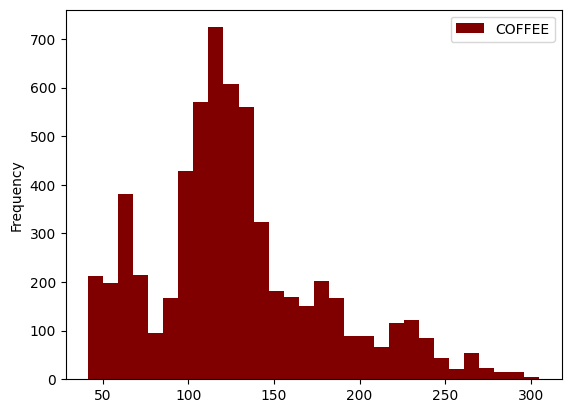

In [ ]:
df1.plot(kind='hist', bins=30, color='maroon')

In [ ]:
df1 = df1[(df1['Date'] >= '2020-01-01') & (df1['Date'] <= '2020-12-31')].reset_index(drop=True)
df1

,Date,COFFEE
0,2020-01-02,127.10
1,2020-01-03,126.35
2,2020-01-06,122.15
3,2020-01-07,122.40
4,2020-01-08,119.15
...,...,...
254,2020-12-24,125.95
255,2020-12-28,123.35
256,2020-12-29,125.40
257,2020-12-30,125.40


In [ ]:
df1.set_index(pd.to_datetime(df1['Date']), inplace=True)
df1.drop('Date', axis=1, inplace=True)
df1.head()

,COFFEE
Date,
2020-01-02,127.10
2020-01-03,126.35
2020-01-06,122.15
2020-01-07,122.40
2020-01-08,119.15


### **Plot Data**

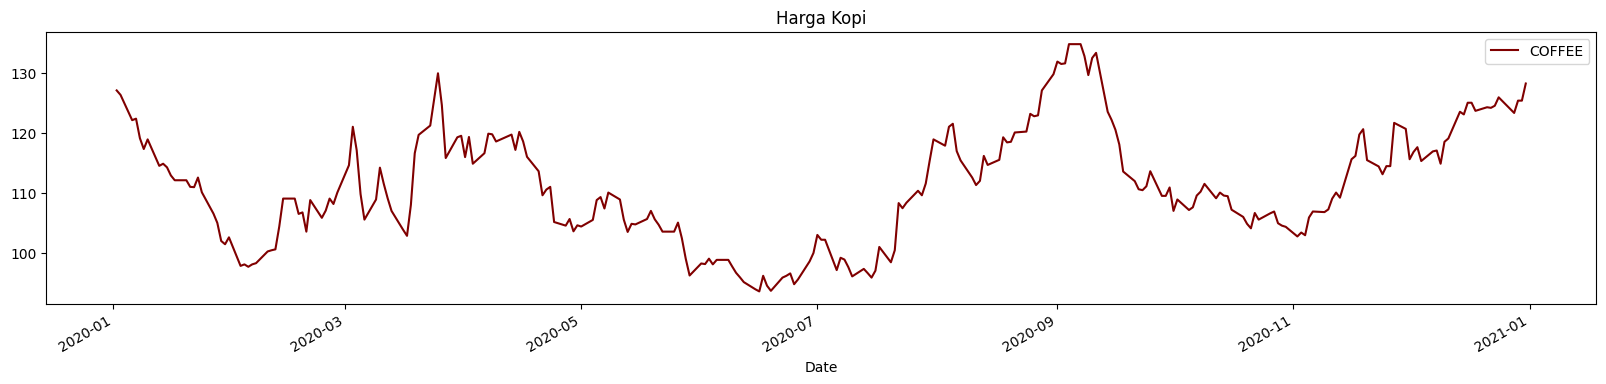

In [ ]:
df1.plot(color='maroon', figsize=(20,4))
plt.title('Harga Kopi')
plt.savefig('Harga Kopi.png')
plt.show()

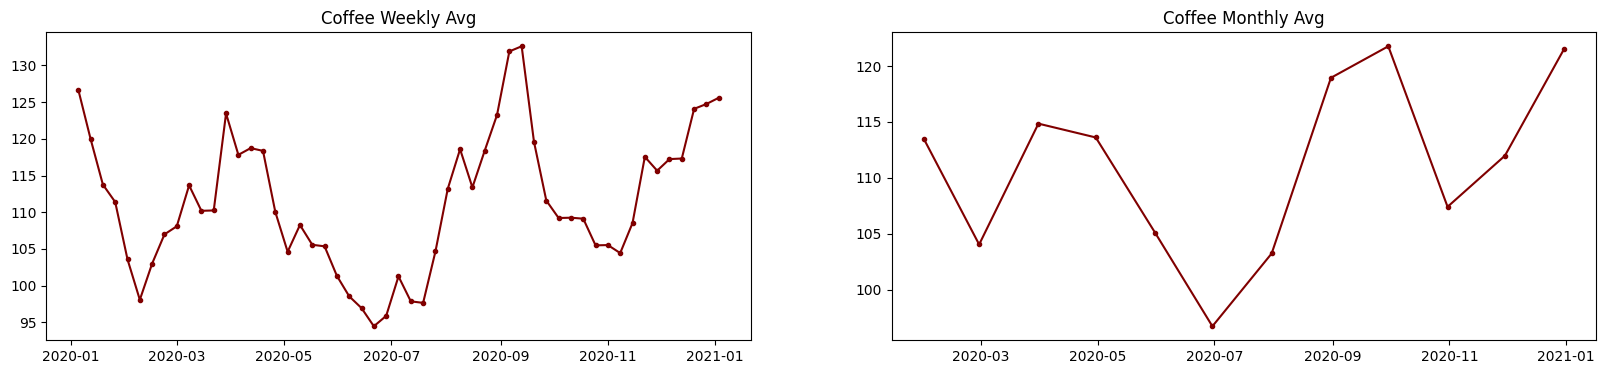

In [ ]:
df1_weekly_avg = df1.resample('W').mean()
df1_monthly_avg = df1.resample('M').mean()

plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('Coffee Weekly Avg')
plt.plot(df1_weekly_avg, "-o", markersize=3, color='maroon')
plt.subplot(122)
plt.title('Coffee Monthly Avg')
plt.plot(df1_monthly_avg, "-o", markersize=3, color='maroon')

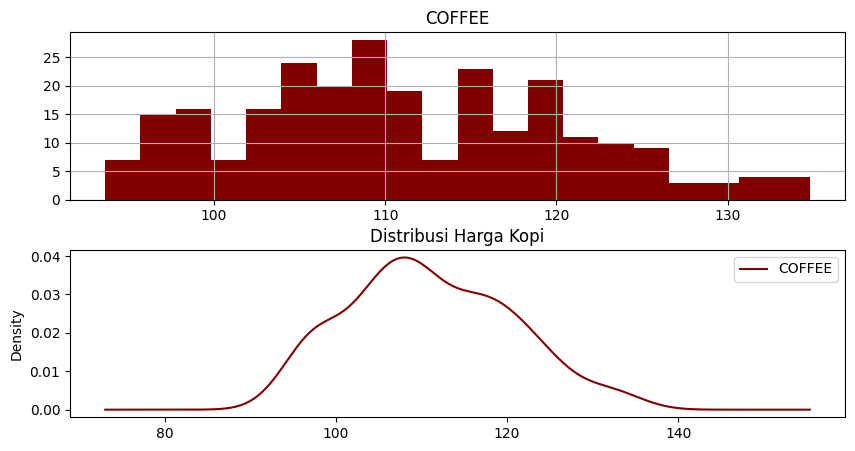

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10,5))
df1.hist(ax=ax1, bins=20, color='maroon')
df1.plot(kind='kde', ax=ax2, color='maroon')
plt.title('Distribusi Harga Kopi')
plt.show()

# **Cek Stasioneritas Data Terhadap Variansi Menggunakan Box Cox**

### **Transformasi Box Cox**

In [ ]:
df1_boxcox, best_lambda = boxcox(df1['COFFEE'])
print('Lambda Value:', best_lambda)

Lambda Value: -0.5655535458560442


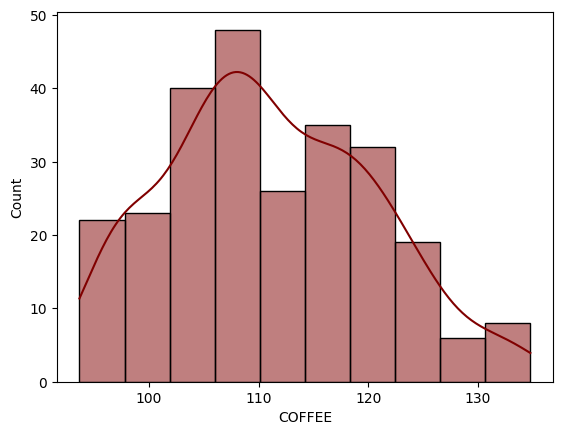

In [ ]:
#plot the distribution of data values
sns.histplot(df1['COFFEE'], kde=True, color='maroon')

#perform Box-Cox transformation on original data
df1_transform_boxcox = 1/np.sqrt(df1['COFFEE'])

Text(0.5, 1.0, 'Distribusi Transformasi Harga Kopi')

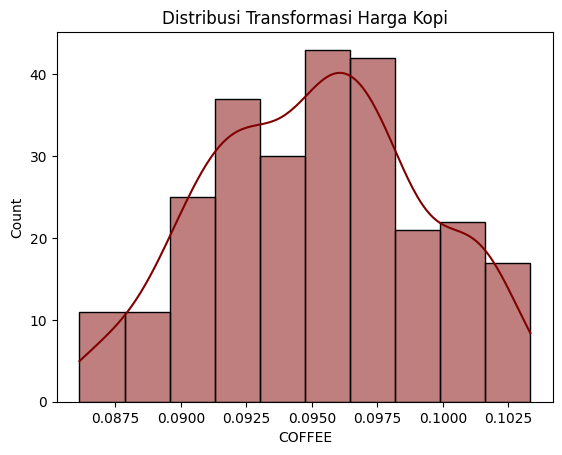

In [ ]:
sns.histplot(df1_transform_boxcox, kde=True, color='maroon')
plt.title('Distribusi Transformasi Harga Kopi')

Lambda value = -1.99 (kita asumsikan -1), karena lambda -1 kemudian ditransformasi menggunakan rumus 1/Yt. Dimana lambda value (-1) disebut rounded value. Didapatkan hasil transformasi antara 0.003997 - 0.0115

0.004 adalah batas bawah dan 0.0115 adalah batas atas. Karena nilai rounded value berada di luar interval transformasi, maka dapat disimpulkan bahwa data tidak stasioner terhadap variansi

# **Cek Stasioneritas Data Terhadap Mean Menggunakan Uji ADF**

In [ ]:
df1

In [ ]:
def test_stationarity(timeseries):
  result = adfuller(timeseries)
  print('ADF Statistic: ', result[0])
  print('p-value: ', result[1])
  print('Critical Values: ')
  for key, value in result[4].items():
    print('\t', key, ':', value)

  if result[1] <= 0.05:
    print('\nData setelah transformasi adalah stasioner.')
  else:
    print('\nData setelah transformasi tidak stasioner.')

In [ ]:
# Uji stasionaritas pada data setelah transformasi
print("Uji stasionaritas sebelum transformasi:")
test_stationarity(df1)

print("\nUji stasionaritas setelah transformasi Box-Cox:")
test_stationarity(df1_transform_boxcox)

Uji stasionaritas sebelum transformasi:
ADF Statistic:  -2.3433391215759736
p-value:  0.15837082842733952
Critical Values: 
	 1% : -3.4562572510874396
	 5% : -2.8729420379793598
	 10% : -2.5728461399461744

Data setelah transformasi tidak stasioner.

Uji stasionaritas setelah transformasi Box-Cox:
ADF Statistic:  -2.34275056373604
p-value:  0.15855039117812597
Critical Values: 
	 1% : -3.4560535712549925
	 5% : -2.8728527662442334
	 10% : -2.5727985212493754

Data setelah transformasi tidak stasioner.


Karena data masih tidak stasioner, maka perlu dilakukan differencing

### **Differencing**

In [ ]:
df1_diff = df1.diff().dropna()
test_stationarity(df1_diff['COFFEE'])

ADF Statistic:  -11.712800125521367
p-value:  1.4751911608214284e-21
Critical Values: 
	 1% : -3.4561550092339512
	 5% : -2.8728972266578676
	 10% : -2.5728222369384763

Data setelah transformasi adalah stasioner.


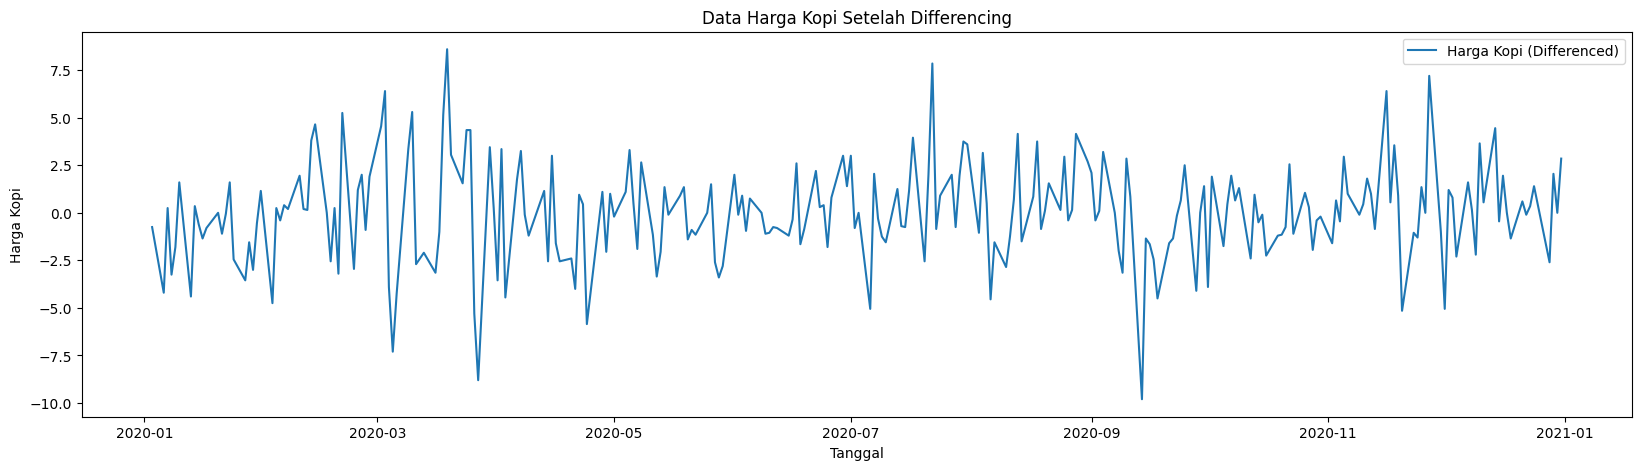

In [ ]:
# Visualisasi data setelah differencing
plt.figure(figsize=(20,5))
plt.plot(df1_diff, label='Harga Kopi (Differenced)')
plt.title('Data Harga Kopi Setelah Differencing')
plt.xlabel('Tanggal')
plt.ylabel('Harga Kopi')
plt.legend()
plt.show()

# **ARIMA atau SARIMA**

### **Plot ACF dan PACF**

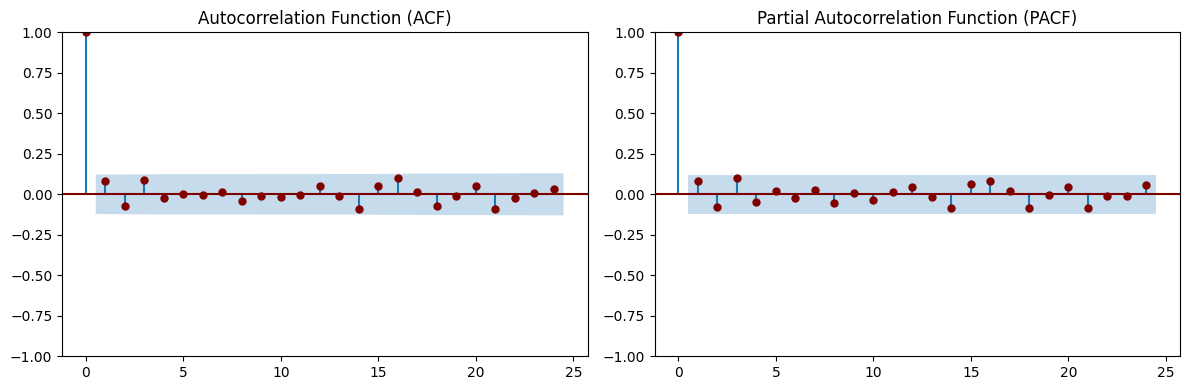

In [ ]:
import statsmodels.api as sm

# Create subplots
significance_level = 0.05
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot with significant lines
sm.graphics.tsa.plot_acf(df1_diff, lags=24, alpha=significance_level,ax=ax1, color='maroon')
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot with significant lines
sm.graphics.tsa.plot_pacf(df1_diff, lags=24, alpha=significance_level,ax=ax2, color='maroon')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


Berdasarkan plot Korelogram ACF -> cut off pada lag 5, 13, 14, dan 19.

Berdasarkan plot Korelogram PACF -> cut off pada lag 5, 13, 14, dan 19.

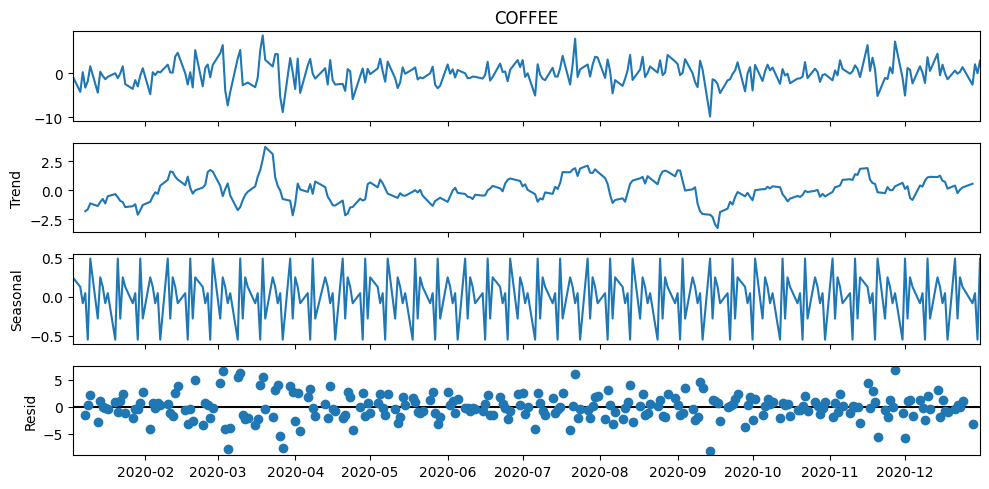

In [ ]:
plt.rcParams['figure.figsize'] = 10, 5
decomposition = seasonal_decompose(df1_diff['COFFEE'], period = 7, model = 'additive')
decomposition.plot()
plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

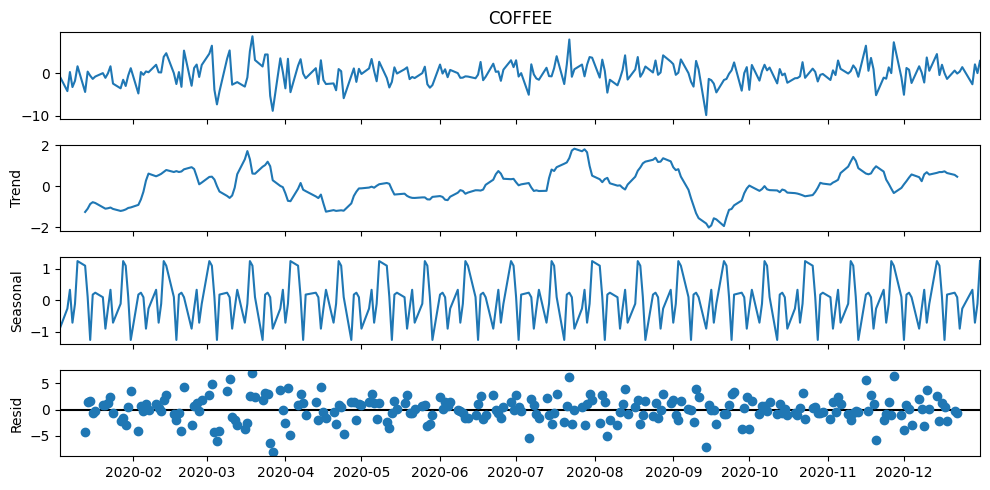

In [ ]:
plt.rcParams['figure.figsize'] = 10, 5
decomposition = seasonal_decompose(df1_diff['COFFEE'], period = 12, model = 'additive')
decomposition.plot()
plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

### **Identifikasi Model**

In [ ]:
# pip install pmdarima

In [69]:
from pmdarima import auto_arima
model = auto_arima(df1_diff['COFFEE'], d=1, D=0, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1383.541, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1337.032, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1381.546, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1336.818, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1337.147, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1338.859, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1289.897, Time=0.09 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1291.406, Time=0.23 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1291.439, Time=0.19 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1293.317, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1283.109, Time=0.12 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1284.731, Time=0.28 sec
 ARIMA(3,1,0)(0,0,1)[12] inte

In [ ]:
# model2 = auto_arima(df1_diff['COFFEE'], d=1, D=1, seasonal=True, m=30, trace=True, error_action='ignore', suppress_warnings=True)

In [ ]:
model3 = auto_arima(df1_diff['COFFEE'], d=1, D=1, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1506.102, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1424.631, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1466.015, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1397.648, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=1441.912, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=1349.857, Time=0.22 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=1373.917, Time=0.12 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=0.89 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.61 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=1344.416, Time=1.23 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=1366.249, Time=0.78 s

### **Kombinasi Model Menggunakan Nilai AIC**

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -638.386
Date:                            Wed, 18 Dec 2024   AIC                           1292.773
Time:                                    12:06:44   BIC                           1320.783
Sample:                                         0   HQIC                          1304.052
                                            - 258                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7255      0.053    -13.653      0.000      -0.830      -0.621
ar.L2         -0.6312      0.073     -8.592      0.000      -0.775      -0.487
ar.L3         -0.3903      0.080     -4.900      0.000      -0.546      -0.234
ar.L4         -0.3281      0.076     -4.335      0.000      -0.476      -0.180
ar.L5         -0.1553      0.063     -2.481      0.013      -0.278      -0.033
ar.S.L12      -0.6254      0.059    -10.523      0.000      -0.742      -0.509
ar.S.L24      -0.2481      0.062     -3.992      0.000      -0.370      -0.126
sigma2        10.4812      0.782     13.405      0.000       8.949      12.014
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                21.56
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.35
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Estimasi Parameter**

In [71]:
# Estimasi parameter menggunakan metode MLE dengan SARIMA
model = sm.tsa.statespace.SARIMAX(df1_diff['COFFEE'], order=(5, 1, 0), seasonal_order=(0, 0, 0, 12))
results = model.fit()  # Default: Metode Maximum Likelihood

# Menampilkan hasil estimasi
print(results.summary())

# Ekstrak parameter
print("Parameter AR1:", results.params['ar.L1'])
print("Parameter AR2:", results.params['ar.L2'])
print("Parameter AR3:", results.params['ar.L3'])
print("Parameter AR4:", results.params['ar.L4'])
print("Parameter AR5:", results.params['ar.L5'])
# print("Parameter SAR12:", results.params['ar.S.L12'])
# print("Parameter SAR24:", results.params['ar.S.L24'])
print("Varians Residual (sigma2):", results.params['sigma2'])


                               SARIMAX Results                                
Dep. Variable:                 COFFEE   No. Observations:                  258
Model:               SARIMAX(5, 1, 0)   Log Likelihood                -628.090
Date:                Wed, 18 Dec 2024   AIC                           1268.179
Time:                        12:52:49   BIC                           1289.474
Sample:                             0   HQIC                          1276.743
                                - 258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7345      0.051    -14.518      0.000      -0.834      -0.635
ar.L2         -0.6835      0.064    -10.645      0.000      -0.809      -0.558
ar.L3         -0.4137      0.080     -5.160      0.0

### **Uji Kelayakan Model Menggunakan Ljung-Box**

H0 : Residual data adalah white noise

H1 : Residual data bukan white noise


Nilai Q = 0.14 &
Chi Square = 0.71

Aturan : Tolak H0 jika Nilai Q < Chi Square

Keputusan : Tolak H0, sehingga residual data bukan white noise


Karena residual data bukan white noise, maka dilakukan differencing yang kedua

# **Differencing kedua**

In [72]:
df1_diff2 = df1_diff.diff().dropna()
test_stationarity(df1_diff2['COFFEE'])

ADF Statistic:  -7.3711692826030255
p-value:  8.96397956931205e-11
Critical Values: 
	 1% : -3.457664132155201
	 5% : -2.8735585105960224
	 10% : -2.5731749894132916

Data setelah transformasi adalah stasioner.


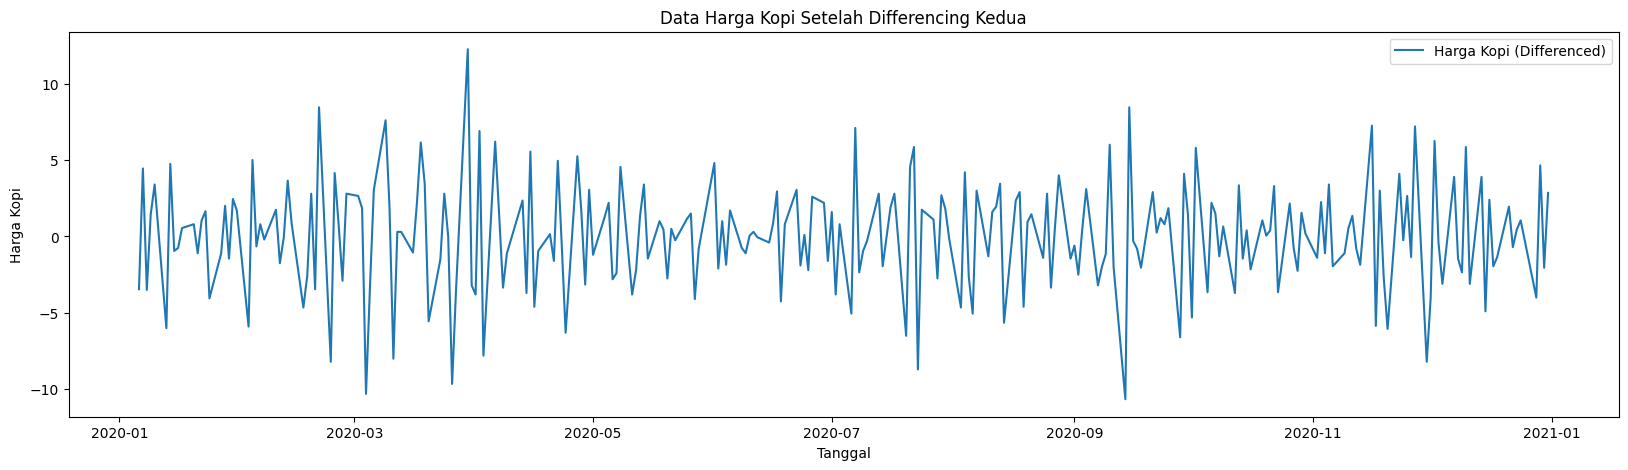

In [73]:
# Visualisasi data setelah differencing
plt.figure(figsize=(20,5))
plt.plot(df1_diff2, label='Harga Kopi (Differenced)')
plt.title('Data Harga Kopi Setelah Differencing Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Harga Kopi')
plt.legend()
plt.show()

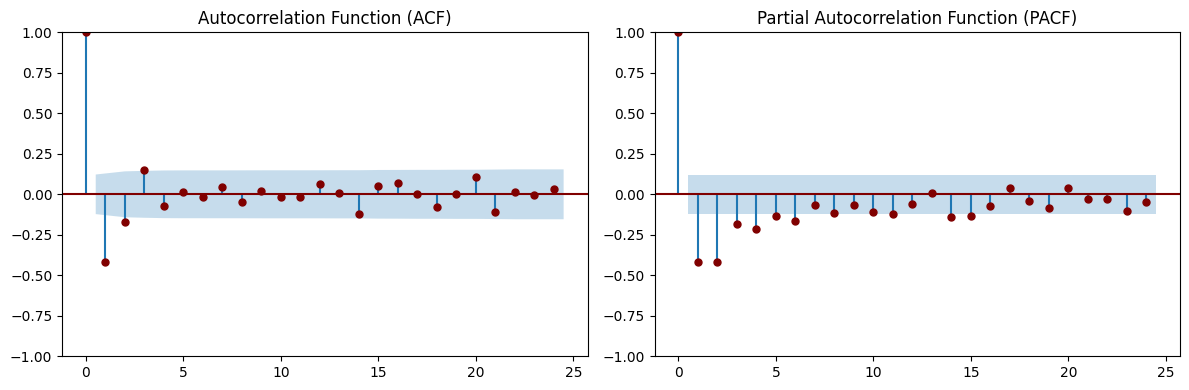

In [74]:
# Create subplots
significance_level = 0.05
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot with significant lines
sm.graphics.tsa.plot_acf(df1_diff2, lags=24, alpha=significance_level,ax=ax1, color='maroon')
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot with significant lines
sm.graphics.tsa.plot_pacf(df1_diff2, lags=24, alpha=significance_level,ax=ax2, color='maroon')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [76]:
# from pmdarima import auto_arima
model = auto_arima(df1_diff2['COFFEE'], d=2, D=0, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=3.91 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1930.500, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1778.923, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1779.025, Time=0.04 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=1780.826, Time=0.25 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1780.862, Time=0.19 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1779.016, Time=0.33 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=1782.821, Time=0.97 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1932.320, Time=0.05 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=1644.199, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=1643.527, Time=0.06 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=1644.377, Time=0.16 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=1645.302, Time=0.35 sec
 ARIMA(3,2,0)(0,0,0)[12]     

In [58]:
model2 = auto_arima(df1_diff2['COFFEE'], d=0, D=2, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,2,1)[12]             : AIC=inf, Time=10.94 sec
 ARIMA(0,0,0)(0,2,0)[12]             : AIC=1659.166, Time=0.06 sec
 ARIMA(1,0,0)(1,2,0)[12]             : AIC=1485.042, Time=0.30 sec
 ARIMA(0,0,1)(0,2,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(1,0,0)(0,2,0)[12]             : AIC=1615.212, Time=0.10 sec
 ARIMA(1,0,0)(2,2,0)[12]             : AIC=1428.429, Time=1.76 sec
 ARIMA(1,0,0)(2,2,1)[12]             : AIC=inf, Time=7.33 sec
 ARIMA(1,0,0)(1,2,1)[12]             : AIC=inf, Time=2.86 sec
 ARIMA(0,0,0)(2,2,0)[12]             : AIC=1469.624, Time=0.43 sec
 ARIMA(2,0,0)(2,2,0)[12]             : AIC=1395.022, Time=0.94 sec
 ARIMA(2,0,0)(1,2,0)[12]             : AIC=1443.133, Time=0.48 sec
 ARIMA(2,0,0)(2,2,1)[12]             : AIC=inf, Time=8.08 sec
 ARIMA(2,0,0)(1,2,1)[12]             : AIC=inf, Time=3.86 sec
 ARIMA(3,0,0)(2,2,0)[12]             : AIC=1391.458, Time=1.08 sec
 ARIMA(3,0,0)(1,2,0)[12]             : AIC=1439.

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  257
Model:             SARIMAX(5, 2, 0)x(2, 2, 0, 12)   Log Likelihood                -782.059
Date:                            Wed, 18 Dec 2024   AIC                           1580.118
Time:                                    12:42:49   BIC                           1607.657
Sample:                                         0   HQIC                          1591.225
                                            - 257                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7424      0.053    -33.160      0.000      -1.845      -1.639
ar.L2         -1.9873      0.102    -19.434      0.000      -2.188      -1.787
ar.L3         -1.6162      0.119    -13.582      0.000      -1.849      -1.383
ar.L4         -0.9872      0.102     -9.725      0.000      -1.186      -0.788
ar.L5         -0.3849      0.063     -6.130      0.000      -0.508      -0.262
ar.S.L12      -1.0259      0.051    -20.058      0.000      -1.126      -0.926
ar.S.L24      -0.4932      0.064     -7.661      0.000      -0.619      -0.367
sigma2        47.2170      3.773     12.514      0.000      39.822      54.612
===================================================================================
Ljung-Box (L1) (Q):                   4.93   Jarque-Bera (JB):                11.65
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
# Estimasi parameter menggunakan metode MLE dengan SARIMA
model = sm.tsa.statespace.SARIMAX(df1_diff2['COFFEE'], order=(5, 2, 0), seasonal_order=(0, 0, 0, 12))
results = model.fit()  # Default: Metode Maximum Likelihood

# Menampilkan hasil estimasi
print(results.summary())

# Ekstrak parameter
print("Parameter AR1:", results.params['ar.L1'])
print("Parameter AR2:", results.params['ar.L2'])
print("Parameter AR3:", results.params['ar.L3'])
print("Parameter AR4:", results.params['ar.L4'])
print("Parameter AR5:", results.params['ar.L5'])
# print("Parameter SAR12:", results.params['ar.S.L12'])
# print("Parameter SAR24:", results.params['ar.S.L24'])
print("Varians Residual (sigma2):", results.params['sigma2'])

                               SARIMAX Results                                
Dep. Variable:                 COFFEE   No. Observations:                  257
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -742.886
Date:                Wed, 18 Dec 2024   AIC                           1497.773
Time:                        12:53:56   BIC                           1519.020
Sample:                             0   HQIC                          1506.320
                                - 257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7825      0.057    -31.123      0.000      -1.895      -1.670
ar.L2         -2.0743      0.098    -21.120      0.000      -2.267      -1.882
ar.L3         -1.6775      0.118    -14.193      0.0

H0 : Residual data adalah white noise

H1 : Residual data bukan white noise


Nilai Q = 3.75 ||  Chi Square = 0.05

Aturan : Tolak H0 jika Nilai Q < Chi Square


Keputusan : Gagal tolak H0, sehingga residual data adalah white noise

# **Uji Kenormalan sisaan dengan menggunakan Kolmogorof-Smirnov atau Shapiro-Wilks**

In [82]:
from scipy import stats
# Uji Kolmogorov-Smirnov
statistic, p_value = stats.kstest(df1_diff2, 'norm', args=(df1_diff2['COFFEE'].mean(), df1_diff2['COFFEE'].std()))

# Output hasil uji
print(f"Statistik K-S: {statistic}")
print(f"P-Value: {p_value}")

# Kesimpulan
if p_value < 0.05:
    print("Tolak H0: Data tidak berdistribusi normal.")
else:
    print("Gagal tolak H0: Data berdistribusi normal.")

Statistik K-S: [0.03814525]
P-Value: [0.83456585]
Gagal tolak H0: Data berdistribusi normal.


# **Forecasting**

# **Evaluasi Metrik**

# **Data Gula**

In [ ]:
df2 = df.loc[:, ["Date", "SUGAR"]]
df2.info()

In [ ]:
df2.plot(kind='hist', bins=30, color='maroon')

In [ ]:
df2 = df2.fillna(df2['SUGAR'].mean())
df2.info()

In [ ]:
df2.plot(kind='hist', bins=30, color='maroon')

In [ ]:
df2 = df2[(df2['Date'] >= '2017-01-01') & (df2['Date'] <= '2021-12-31')].reset_index(drop=True)
df2

In [ ]:
df2.set_index(pd.to_datetime(df2['Date']), inplace=True)
df2.drop('Date', axis=1, inplace=True)
df2.head()

In [ ]:
df2.plot(color='maroon')
plt.title('Harga Gula')
plt.savefig('Harga Gula.png')
plt.show()

In [ ]:
df2_weekly_avg = df2.resample('W').mean()
df2_monthly_avg = df2.resample('M').mean()

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Sugar Weekly Avg')
plt.plot(df2_weekly_avg, "-o", markersize=3, color='maroon')
plt.subplot(122)
plt.title('Sugar Monthly Avg')
plt.plot(df2_monthly_avg, "-o", markersize=3, color='maroon')

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10,5))
df2.hist(ax=ax1, bins=20, color='maroon')
df2.plot(kind='kde', ax=ax2, color='maroon')
plt.title('Distribusi Harga Gula')
plt.show()